# Data generation

In [98]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

In [99]:
# create a tensor of size 2xk where k is random
# and the elements are random
def create_data(n,min,max):
     dataset = []
     for i in range(n):
          k = random.randint(min,max)
          [a,b] = random.sample(range(k),2)
          data = torch.zeros(k,2)
          for i in range(k):
               data[i][0] = random.random()
               if i == a or i == b:
                    data[i][1] = 1
          y = data[a][0]+data[b][0]
          dataset.append((data,y))

     return dataset

In [100]:
train_dataset = create_data(5000,2,9)

In [101]:
test_dataset1 = create_data(5000,2,9)
test_dataset2 = create_data(5000,10,19)

In [129]:
test_dataset3 = create_data(100,4,15)

# RNN

In [102]:
class RNN():
    def __init__(self,dimh,dimx,dimy):
        self.Whx = torch.randn(dimh,dimx,requires_grad=True)
        self.Wyh = torch.randn(dimy,dimh,requires_grad=True)
        self.Whh = torch.randn(dimh,dimh,requires_grad=True)
        self.bh = torch.randn(dimh,requires_grad=True)
        self.by = torch.randn(dimy,requires_grad=True)
        
        self.h = torch.zeros(dimh)
        
    def forward_pass(self,x):             
        h = self.h
        for i in range(x.shape[0]):    
            h = torch.matmul(self.Whx, x[i]) + \
                torch.matmul(self.Whh, h)+self.bh
            h = torch.tanh(h)
        y = torch.matmul(self.Wyh,h) + self.by
        return y

    def get_loss(self,x):
        y = self.forward_pass(x[0])
        loss = (y-x[1])**2
        return loss
    
    def train(self,dataset,epoch):
        rnn_losses = []
        optimizer = torch.optim.Adam(
            [self.Whx, self.Whh, self.Wyh, self.bh, self.by], lr=0.001)
        for i in range(epoch):
            losses = []
            for data in dataset:
                loss = self.get_loss(data)
                optimizer.zero_grad()
                loss.backward()
                # print(f"Whx: {self.Whx.grad}")
                optimizer.step()
                losses.append(loss)
                # print(f"loss : {loss}")
            rnn_losses.append(sum(losses)/len(losses))
            print(f"Epoch: {i} Loss: {sum(losses)/len(losses)}")
        return rnn_losses

    def test(self, dataset):
        losses = []
        for data in dataset:
            loss = self.get_loss(data)
            losses.append(loss)
        return sum(losses)/len(losses)


In [103]:
rnn = RNN(dimh=2,dimx=2,dimy=1)

In [104]:
rnn_losses = rnn.train(train_dataset,10)

Epoch: 0 Loss: tensor([0.2357], grad_fn=<DivBackward0>)
Epoch: 1 Loss: tensor([0.1695], grad_fn=<DivBackward0>)
Epoch: 2 Loss: tensor([0.1655], grad_fn=<DivBackward0>)
Epoch: 3 Loss: tensor([0.1593], grad_fn=<DivBackward0>)
Epoch: 4 Loss: tensor([0.1411], grad_fn=<DivBackward0>)
Epoch: 5 Loss: tensor([0.0967], grad_fn=<DivBackward0>)
Epoch: 6 Loss: tensor([0.0611], grad_fn=<DivBackward0>)
Epoch: 7 Loss: tensor([0.0468], grad_fn=<DivBackward0>)
Epoch: 8 Loss: tensor([0.0376], grad_fn=<DivBackward0>)
Epoch: 9 Loss: tensor([0.0313], grad_fn=<DivBackward0>)


# LSTM

In [105]:
class LSTM():
    def __init__(self,dim_h,dim_y,dim_x):
        self.C = torch.zeros(dim_h)
        self.h = torch.zeros(dim_h)

        self.Wf = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wi = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wc = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wo = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wy = torch.randn(dim_y,dim_h,requires_grad=True)

        self.bf = torch.randn(dim_h,requires_grad=True)
        self.bi = torch.randn(dim_h,requires_grad=True)
        self.bc = torch.randn(dim_h,requires_grad=True)
        self.bo = torch.randn(dim_h,requires_grad=True)
        self.by = torch.randn(dim_y,requires_grad=True)


    def forward_pass(self,x):
        C = self.C
        h = self.h

        for i in range(x.shape[0]):
            xcomp = torch.cat((x[i],h),dim=0)
            f = torch.sigmoid(self.Wf@xcomp + self.bf)
            i = torch.sigmoid(self.Wi@xcomp + self.bi)
            o = torch.sigmoid(self.Wo@xcomp + self.bo)
            C = f*C + i*torch.tanh(self.Wc@xcomp + self.bc)
            h = o*torch.tanh(C)
        y = self.Wy@h + self.by
        return y
        
    def get_loss(self,x):
        y = self.forward_pass(x[0])
        loss = (y-x[1])**2
        return loss
    
    def train(self,dataset,epoch):
        lstm_losses = []
        optimizer = torch.optim.Adam(
            [self.Wf, self.Wi, self.Wc, self.Wo, self.Wy, self.bf, self.bi, self.bc, self.bo, self.by], lr=0.001)
        for epoch in range(epoch):
            losses = []
            for data in dataset:
                loss = self.get_loss(data)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss)
            lstm_losses.append(sum(losses)/len(losses))
            print(f'epoch : {epoch} loss : {sum(losses)/len(losses)}')
        return lstm_losses
    
    def test(self, dataset):
        losses = []
        for data in dataset:
            loss = self.get_loss(data)
            losses.append(loss)
        return sum(losses)/len(losses)


In [106]:
lstm = LSTM(dim_h=2,dim_y=1,dim_x=2)

In [107]:
lstm.forward_pass(train_dataset[0][0])

tensor([-0.0235], grad_fn=<AddBackward0>)

In [108]:
lstm.get_loss(train_dataset[0])

tensor([1.1091], grad_fn=<PowBackward0>)

In [109]:
lstm_losses = lstm.train(train_dataset,10)

epoch : 0 loss : tensor([0.1356], grad_fn=<DivBackward0>)
epoch : 1 loss : tensor([0.0344], grad_fn=<DivBackward0>)
epoch : 2 loss : tensor([0.0129], grad_fn=<DivBackward0>)
epoch : 3 loss : tensor([0.0075], grad_fn=<DivBackward0>)
epoch : 4 loss : tensor([0.0054], grad_fn=<DivBackward0>)
epoch : 5 loss : tensor([0.0041], grad_fn=<DivBackward0>)
epoch : 6 loss : tensor([0.0032], grad_fn=<DivBackward0>)
epoch : 7 loss : tensor([0.0024], grad_fn=<DivBackward0>)
epoch : 8 loss : tensor([0.0019], grad_fn=<DivBackward0>)
epoch : 9 loss : tensor([0.0014], grad_fn=<DivBackward0>)


# GRU

In [110]:
class GRU():
    def __init__(self,dim_h,dim_y,dim_x):
        self.h = torch.zeros(dim_h)
        self.Wz = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wr = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wg = torch.randn(dim_h,dim_h+dim_x,requires_grad=True)
        self.Wy = torch.randn(dim_y,dim_h,requires_grad=True)
        
        self.bz = torch.randn(dim_h,requires_grad=True)
        self.br = torch.randn(dim_h,requires_grad=True)
        self.bg = torch.randn(dim_h,requires_grad=True)
        self.by = torch.randn(dim_y,requires_grad=True)
    
    def forward_pass(self,x):
        h = self.h

        for i in range(x.shape[0]):
            x_comp = torch.cat((x[i],h),dim=0)
            z = torch.sigmoid(self.Wz@x_comp+self.bz)
            r = torch.sigmoid(self.Wr@x_comp+self.br)
    
            _h = torch.tanh(self.Wg@(torch.cat((x[i],r*h),dim=0))+self.bg)

            h = (1-z)*h+z*_h
        
        y = self.Wy@h+self.by
        return y
    
    def get_loss(self,x):
        y = self.forward_pass(x[0])
        loss = (y-x[1])**2
        return loss
    
    def train(self,dataset,epoch):
        gru_losses = []
        optimizer = torch.optim.Adam(
            [self.Wz, self.Wr, self.Wg, self.Wy,self.bz,self.br,self.bg,self.by], lr=0.001)
        for epoch in range(epoch):
            losses = []
            for data in dataset:
                loss = self.get_loss(data)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                # print(f'loss : {loss}')
                losses.append(loss)
            gru_losses.append(sum(losses)/len(losses))
            print(f'epoch : {epoch} loss : {sum(losses)/len(losses)}')
        return gru_losses
    
    def test(self, dataset):
        losses = []
        for data in dataset:
            loss = self.get_loss(data)
            losses.append(loss)
        return sum(losses)/len(losses)
        

In [111]:
gru = GRU(dim_h=2,dim_y=1,dim_x=2)

In [112]:
gru.forward_pass(train_dataset[0][0])

tensor([1.1584], grad_fn=<AddBackward0>)

In [113]:
gru.get_loss(train_dataset[19])

tensor([0.4677], grad_fn=<PowBackward0>)

In [114]:
gru_losses = gru.train(train_dataset,10)

epoch : 0 loss : tensor([0.1576], grad_fn=<DivBackward0>)
epoch : 1 loss : tensor([0.0883], grad_fn=<DivBackward0>)
epoch : 2 loss : tensor([0.0322], grad_fn=<DivBackward0>)
epoch : 3 loss : tensor([0.0162], grad_fn=<DivBackward0>)
epoch : 4 loss : tensor([0.0089], grad_fn=<DivBackward0>)
epoch : 5 loss : tensor([0.0047], grad_fn=<DivBackward0>)
epoch : 6 loss : tensor([0.0024], grad_fn=<DivBackward0>)
epoch : 7 loss : tensor([0.0014], grad_fn=<DivBackward0>)
epoch : 8 loss : tensor([0.0010], grad_fn=<DivBackward0>)
epoch : 9 loss : tensor([0.0007], grad_fn=<DivBackward0>)


# baseline

In [115]:
class BaseLine():
    def __init__(self):
        pass

    def forward_pass(self, x):
        return 1

    def get_loss(self, x):
        y = self.forward_pass(x[0])
        loss = (y-x[1])**2
        return loss

    def test(self, dataset):
        losses = []
        for data in dataset:
            loss = self.get_loss(data)
            losses.append(loss)
        return sum(losses)/len(losses)



In [116]:
baseline = BaseLine()
baseLine_loss = baseline.test(train_dataset)
print(baseLine_loss)

tensor(0.1707)


# Learning Curve

In [117]:
rnn_losses = [i.detach().numpy() for i in rnn_losses]
lstm_losses = [i.detach().numpy() for i in lstm_losses]
gru_losses = [i.detach().numpy() for i in gru_losses]


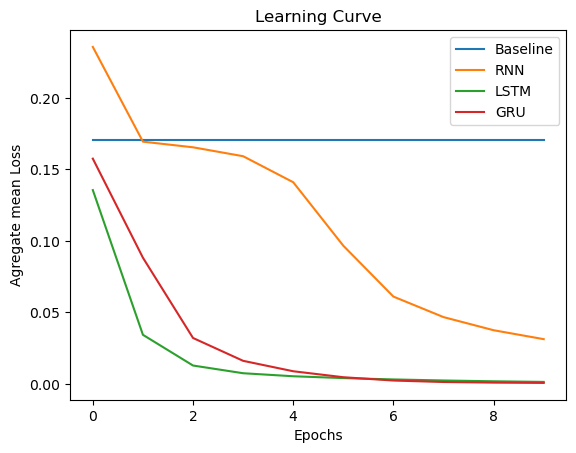

In [122]:
epochs = [i for i in range(10)]


baseLine_losses = [baseLine_loss for i in range(10)]

plt.plot(epochs,baseLine_losses,label='Baseline')
plt.plot(epochs,rnn_losses,label='RNN')
plt.plot(epochs,lstm_losses,label='LSTM')
plt.plot(epochs,gru_losses,label='GRU')
plt.xlabel('Epochs')
plt.ylabel('Agregate mean Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Test Performance

In [119]:
test_rnn_losses = rnn.test(test_dataset1)
test_lstm_losses = lstm.test(test_dataset1)
test_gru_losses = gru.test(test_dataset1)
test_baseline = baseline.test(test_dataset1)

print("Test Performance for test dataset 1 (2 to 9 sequence lengths)")
print(f'RNN test loss : {test_rnn_losses.item()}')
print(f'LSTM test loss : {test_lstm_losses.item()}')
print(f'GRU test loss : {test_gru_losses.item()}')
print(f'Baseline test loss : {test_baseline}')

Test Performance for test dataset 1 (2 to 9 sequence lengths)
RNN test loss : 0.02922888845205307
LSTM test loss : 0.001133543555624783
GRU test loss : 0.0005212354008108377
Baseline test loss : 0.1663127988576889


In [120]:
test_rnn_losses = rnn.test(test_dataset2)
test_lstm_losses = lstm.test(test_dataset2)
test_gru_losses = gru.test(test_dataset2)
test_baseline = baseline.test(test_dataset2)

print("Test Performance for test dataset 2 (10 to 19 sequence lengths)")
print(f'RNN test loss : {test_rnn_losses.item()}')
print(f'LSTM test loss : {test_lstm_losses.item()}')
print(f'GRU test loss : {test_gru_losses.item()}')
print(f'Baseline test loss : {test_baseline}')


Test Performance for test dataset 2 (10 to 19 sequence lengths)
RNN test loss : 0.07422962784767151
LSTM test loss : 0.0059897322207689285
GRU test loss : 0.003093248000368476
Baseline test loss : 0.1648101657629013


# Prediction Vs ground truth

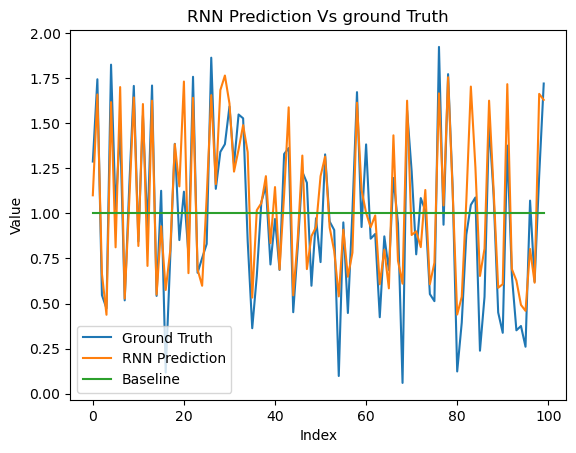

In [137]:
prediction_rnn = [ rnn.forward_pass(i[0]).detach().numpy() for i in test_dataset3]
index = [i for i in range(len(prediction_rnn))]
ground_truth_rnn = [i[1].detach().numpy() for i in test_dataset3]

plt.plot(index,ground_truth_rnn,label='Ground Truth')
plt.plot(index,prediction_rnn,label='RNN Prediction')
plt.plot(index,[1 for i in range(len(index))],label='Baseline')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('RNN Prediction Vs ground Truth')
plt.legend()
plt.show()

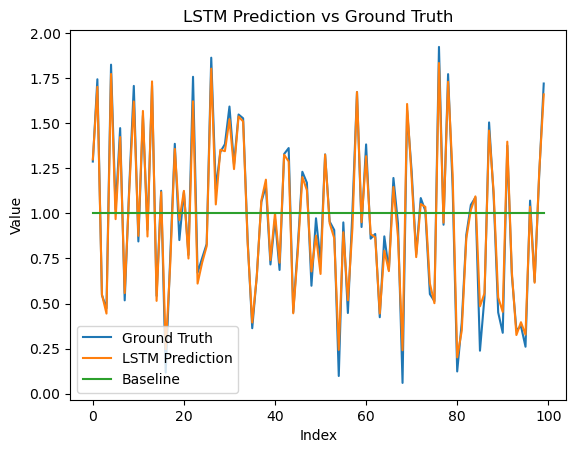

In [136]:
prediction_lstm = [ lstm.forward_pass(i[0]).detach().numpy() for i in test_dataset3]
index = [i for i in range(len(prediction_lstm))]
ground_truth_lstm = [i[1].detach().numpy() for i in test_dataset3]

plt.plot(index,ground_truth_lstm,label='Ground Truth')
plt.plot(index,prediction_lstm,label='LSTM Prediction')
plt.plot(index, [1 for i in range(len(index))], label='Baseline')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('LSTM Prediction vs Ground Truth')
plt.legend()
plt.show()

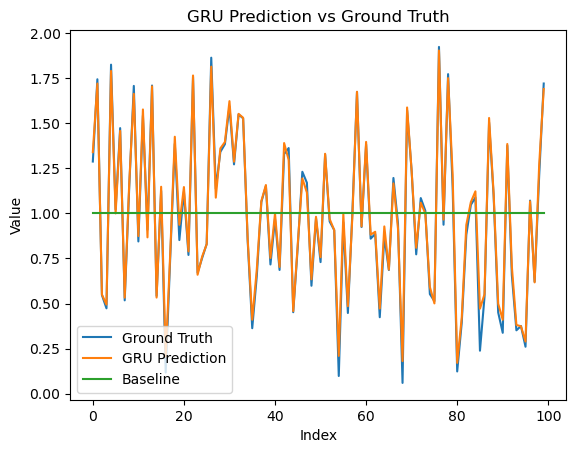

In [133]:
prediction_gru = [ gru.forward_pass(i[0]).detach().numpy() for i in test_dataset3]
index = [i for i in range(len(prediction_gru))]
ground_truth_gru = [i[1].detach().numpy() for i in test_dataset3]

plt.plot(index,ground_truth_gru,label='Ground Truth')
plt.plot(index,prediction_gru,label='GRU Prediction')
plt.plot(index,[1 for i in range(len(index))],label='Baseline')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('GRU Prediction vs Ground Truth')
plt.legend()
plt.show()